In [39]:
import numpy as np
import torch

In [40]:
t1 = torch.tensor(4.)

In [41]:
t1.dtype

torch.float32

In [42]:
t2 = torch.tensor([1., 2, 3, 4])

In [43]:
t2.dtype

torch.float32

In [44]:
t3 = torch.tensor([[2, 3.],
                 [4, 5],
                 [6, 8]])

In [45]:
t3.dtype

torch.float32

In [46]:
t4 = torch.tensor([[[1, 2, 4.],
                    [5, 7, 3]],
                   
                   [[4, 5., 6],
                    [2, 4, 7]]])

In [47]:
t1.shape, t2.shape, t3.shape, t4.shape

(torch.Size([]), torch.Size([4]), torch.Size([3, 2]), torch.Size([2, 2, 3]))

In [48]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)

In [49]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [50]:
y.backward()

In [51]:
print('dy/dx =', x.grad)
print('dy/dw =', w.grad)
print('dy/db =', b.grad)

dy/dx = None
dy/dw = tensor(3.)
dy/db = tensor(1.)


In [52]:
t6 = torch.full((3, 5), 10)
t6

RuntimeError: Providing a bool or integral fill value without setting the optional `dtype` or `out` arguments is currently unsupported. In PyTorch 1.7, when `dtype` and `out` are not set a bool fill value will return a tensor of torch.bool dtype, and an integral fill value will return a tensor of torch.long dtype.

In [ ]:
t7 = torch.full((3, 2), 5)
t7

In [ ]:
t8 = torch.cat((t3, t7))
t8

In [ ]:
t9 = torch.sin(t8)
t9

In [ ]:
t10 = t9.reshape(2, 3, 2)
t10

In [ ]:
x = np.array([1, 3])

y = np.array([[2., 4.],
              [3, 6.]])

print(x)
print(y)

In [ ]:
t11 = torch.from_numpy(x)
t11

t12 = torch.from_numpy(y)
print(t12)

In [ ]:
num = t11.numpy()

In [ ]:
num

In [ ]:
num_2 = t12.numpy()

In [ ]:
num_2

In [ ]:
#pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
#jovian.commit(project='01-pytorch-bascis - assignment')

Linear Regression

In [ ]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 34],
                   [111, 23, 56],
                   [68, 45, 44],
                   [4, 76, 22]], dtype = 'float32')

In [ ]:
targets = np.array([[56, 89],
                  [76, 45],
                  [119, 45],
                  [34, 23],
                  [78,  9]], dtype = 'float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

In [ ]:
#Weights and biases
w = torch.randn(2, 3, requires_grad = True)
b = torch.randn(2, requires_grad = True)
print(w)
print(b)

In [ ]:
def model(x):
    return x @ w.t() + b

In [ ]:
inputs @ w.t() + b

In [ ]:
#Generate predictions
preds = model(inputs)
print(preds)

In [ ]:
print(targets)

In [ ]:
diff = preds - targets
torch.sum(diff * diff) / diff.numel()

In [ ]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [ ]:
loss = mse(preds, targets)
print(loss)

In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

In [ ]:
print(b)
print(b.grad)

In [ ]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 10e-5

In [ ]:
w, b

In [ ]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

In [ ]:
#Train the model using gradient descent

In [ ]:
preds = model(inputs)
print(preds)

In [ ]:
loss = mse(preds, targets)
print(loss)

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

In [ ]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 10e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
print(w)
print(b)

In [ ]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

In [ ]:
for i in range(90):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

In [ ]:
preds

In [ ]:
targets

In [ ]:
#jovian.commit(project = '02 - linear regression')

In [ ]:
import torch.nn as nn

In [ ]:
inputs = np.array([[73, 56, 2],
                  [45, 34, 67],
                  [76, 43, 12],
                  [56, 11, 9],
                  [98, 111, 54],
                  [12, 56, 101],
                  [76, 34, 98],
                  [1, 3, 144],
                  [76, 88, 67],
                  [103, 90, 45],
                  [43, 33, 56],
                  [65, 39, 60],
                  [66, 10, 2],
                  [34, 76, 112]],
                  dtype = 'float32')

In [ ]:
targets = np.array([[34, 12],
                   [12, 22],
                   [76, 12],
                   [89, 8],
                   [56, 43],
                   [78, 15],
                   [33, 77],
                   [87, 56],
                   [90, 111],
                   [116, 160],
                   [101, 74],
                   [10, 30],
                   [35, 51],
                   [112, 50]], 
                   dtype = 'float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
inputs

In [ ]:
targets

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

In [ ]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

In [ ]:
list(model.parameters())

In [ ]:
preds = model(inputs)
preds

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            opt.step()
            opt.zero_grad()
        
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            

In [ ]:
fit(100, model, loss_fn, opt, train_dl)

In [ ]:
preds = model(inputs)
preds

In [ ]:
targets

In [ ]:
model(torch.tensor([[75, 56, 34.]]))

In [ ]:
model2 = nn.Sequential(
    nn.Linear(3, 3),
    nn.Sigmoid(),
    nn.Linear(3, 2)
)

In [ ]:
opt = torch.optim.SGD(model2.parameters(), lr= 1e-3)

In [ ]:
fit(100, model2, F.mse_loss, opt, train_dl)

In [ ]:
#jovian.commit(project = '03 - linear regression2')

Write a medium blogpost

# LESSON TWO

In [ ]:
from torchvision.datasets import mnist
import torchvision
import torch
import matplotlib as plt
%matplotlib inline

In [ ]:
dataset = mnist(root='data/', download=True)

In [ ]:
len(dataset)

In [ ]:
test_data = mnist(root= 'data/', train=False)

In [ ]:
dataset[0]

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap = 'grey')
print('Label:', label)

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap = 'grey')
print('Label', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
dataset = mnist(root= '/data', train= True, transform = transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

In [ ]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

In [ ]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = 'grey')

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
jovian.commit(project='03-logistic-regression-live')

In [ ]:
import torch.nn as nn

input_size = 28*28
num_size =  10

model = nn.Linear(input_size, num_size)

In [ ]:
print(model.weight.shape)

In [ ]:
model.bias.shape

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

In [ ]:
images.shape

In [ ]:
images.reshape(128, 784).shape

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def say_Hello(self):
        print('Hello my name is ' + self.name + '!')

In [ ]:
bob = Person("Bob", 32)

In [ ]:
bob.name, bob.age

In [ ]:
bob.say_Hello()

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(num_size, input_size)

def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out


model = MnistModel()

In [ ]:
model.linear

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
    
print('outputs.shape,' output.shape)
print('Sample Outputs', output[:2])

Try implementing the softax using python codes to generate probabilities

In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

In [ ]:
probs = F.softmax(outputs, dim=1)

In [ ]:
print('Sample submission:', probs[:2].data)\
print('Sum of output:', torch.sum(probs[0]).item())

In [ ]:
max_probs, preds = torch.max(preds, dim= 1)
print(preds)
print(max_probs)

In [ ]:
labels

In [ ]:
outputs[:2]

In [ ]:
torch.sum(preds == labels)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(preds, dim= 1)
    return torch.tensor(torch.sum(preds == labels) / len(preds))

In [ ]:
accuracy(outputs, labels)

In [ ]:
probs

In [ ]:
outputs

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)

In [ ]:
print(loss)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            loss.step()
            loss.zero_grad()
            
        result = evaluate(model, val_loader)
        model.epoch_result(epoch, result)
        history.append(result)
        
    return result

In [ ]:
l1 = [1, 2, 3, 4, 5]

In [ ]:
l2 = [x*2 for x in l1]

In [ ]:
def evaluate (model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MNistModel(nn.Model):
    def __int__(self):
        self.linear = nn.Linear(num_size, input_size)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_accuracy': acc, 'val_loss': loss}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in val_loss]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accuracy = [x['val_accuracy'] for x in acc]
        epoch_acc = torch.stack(batch_accuracy).mean()
        return {'val_loss': epoch_loss, 'val_acc': epoch_acc}
    
    def epoch_end(self, epoch, result):
        print('epoch [{}], val loss [{}], result [{}]'.format(epoch, result['val_loss'], result['val_acc']))
        

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [history['val acc'] for accuracy in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')

In [ ]:
jovian.log_metrics(val_acc = history[-1]['val_acc'], val_loss = history[-1]['val_loss'])

In [ ]:
jovian.commit(project='03-logistic-regression', environment=None)

In [ ]:
test_dataset = mnist(root = '/data', train = False, transform = transforms.ToTensor())
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'grey')
print('Shape', img.shape)
print('Image', img.label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0], item.()

In [ ]:
img, predict = dataset[10]
plt.imshow(img, cmap = 'grey')
print('Label', label ', Predicted', predict_image(img, model))

In [ ]:
img, predict = dataset[190]
plt.imshow(img, cmap = 'grey')
print('Label', label ', Predicted', predict_image(img, model))

In [ ]:
img, predict = dataset[20]
plt.imshow(img, cmap = 'grey')
print('Label', label ', Predicted', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

In [ ]:
result = evaluate(model2, test_loader)

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

In [ ]:
jovian.commit(project='03-logistic-regression', environment = None, outputs = ['mnist-logistic.pth'])

# TOPIC THREE

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

Files already downloaded


image.shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (28, 28, 1) for image data

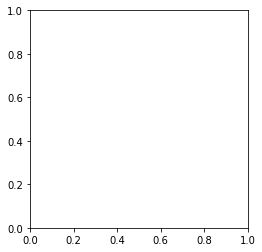

In [3]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [4]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [5]:
batch_size = 128

In [6]:
train_loader = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_loader = DataLoader(val_ds, batch_size * 2, num_workers = 4, pin_memory = True)

images.shape:  torch.Size([128, 1, 28, 28])


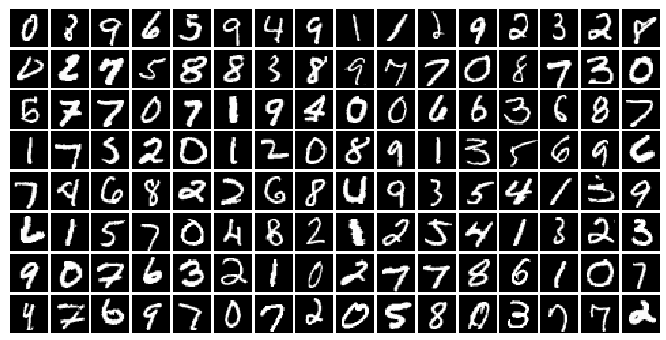

In [7]:
for images, _ in train_loader:
    print('images.shape: ', images.shape)
    plt.figure(figsize = (12, 6))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
    break

In [8]:
for images, labels in train_loader:
    print('images.shape: ', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape: ', inputs.shape)
    break

images.shape:  torch.Size([128, 1, 28, 28])
inputs.shape:  torch.Size([128, 784])


In [9]:
input_size = inputs.shape[-1]
hidden_size = 32

In [10]:
layer1 = nn.Linear(input_size, hidden_size)
inputs.shape

torch.Size([128, 784])

In [11]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape: ', layer1_outputs.shape)

layer1_outputs.shape:  torch.Size([128, 32])


In [12]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [13]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [14]:
#Using Relu as the activation funtion. relu(x) = max(0, x)... It returns negative values as 0 retains postive values.
F.relu(torch.tensor([[2., 4, -4],
                     [-1, 0., 0.11]]))

tensor([[2.0000, 4.0000, 0.0000],
        [0.0000, 0.0000, 0.1100]])

In [15]:
relu_outputs = F.relu(layer1_outputs)
print('minimum layer output:', torch.min(layer1_outputs))
print('maximum layer output:', torch.min(relu_outputs))

minimum layer output: tensor(-0.6815, grad_fn=<MinBackward1>)
maximum layer output: tensor(0., grad_fn=<MinBackward1>)


In [16]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [17]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [18]:
inputs.shape

torch.Size([128, 784])

In [19]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3111, grad_fn=<NllLossBackward>)

In [20]:
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [21]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [22]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [23]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [24]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [25]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [26]:
import jovian

In [27]:
jovian.commit(project='04-feedforward-nn')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


ConnectionError: HTTPSConnectionPool(host='api.jovian.ai', port=443): Max retries exceeded with url: /user/profile (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000226E7F1CD48>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [82]:
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)
    
    def forward(self, xb):
        #flatten the image tensor
        xb = xb.view(xb.size(0), -1)
        #get the linear output
        out = self.linear1(xb)
        #apply the activation function: relu
        out = F.relu(out)
        #get the output using the second layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_losses = torch.stack(batch_losses).mean()  #combine the losses
        batch_accuracies = [x['val_acc'] for x in outputs]
        epoch_accuracies = torch.stack(batch_accuracies).mean() #combine the accuracies
        return {'val_loss': epoch_losses.item(), 'val_acc': epoch_accuracies.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch[{}], val_loss{:.4f}, val_acc{:.4f}".format(epoch, result["val_loss"], result["val_acc"]))

In [83]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.true_divide(torch.sum(preds == labels), len(preds)))

In [84]:
#testing the MnistModel
input_size = 784
hidden_size = 32
num_classes = 10

model = MnistModel(input_size, hidden_size = 32, out_size = num_classes)

In [85]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [86]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

Loss: 2.3078086376190186


Using GPU

In [87]:
torch.cuda.is_available()

False

In [88]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [89]:
device = get_default_device()
device

device(type='cpu')

In [90]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [91]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break
#torch.Size([128, 1, 28, 28])
#cpu

torch.Size([128, 1, 28, 28])
cpu


In [92]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [93]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [94]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [95]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([9, 7, 1, 1, 2, 7, 8, 4, 9, 2, 2, 9, 4, 5, 0, 4, 9, 3, 4, 5, 8, 3, 6, 1,
        8, 0, 3, 9, 8, 5, 5, 9, 8, 6, 4, 7, 7, 5, 2, 3, 6, 2, 7, 6, 6, 9, 6, 5,
        9, 8, 4, 2, 7, 8, 3, 1, 0, 0, 0, 6, 6, 9, 6, 1, 1, 3, 1, 5, 3, 3, 9, 3,
        6, 9, 0, 0, 6, 2, 1, 6, 3, 1, 3, 7, 6, 4, 6, 7, 7, 9, 4, 3, 8, 1, 1, 2,
        6, 5, 3, 3, 1, 3, 2, 4, 7, 9, 9, 4, 3, 6, 3, 3, 1, 9, 8, 8, 0, 9, 5, 0,
        8, 2, 9, 5, 6, 3, 3, 2, 9, 6, 7, 1, 0, 2, 2, 1, 5, 2, 0, 7, 9, 7, 8, 3,
        5, 6, 3, 3, 7, 9, 0, 9, 5, 9, 1, 1, 0, 8, 6, 5, 9, 8, 8, 7, 9, 3, 2, 9,
        6, 9, 6, 7, 9, 9, 7, 3, 3, 5, 1, 5, 6, 9, 2, 7, 7, 5, 1, 6, 0, 9, 3, 1,
        3, 2, 4, 7, 2, 7, 8, 1, 9, 0, 7, 1, 6, 0, 4, 6, 5, 6, 9, 5, 3, 6, 3, 3,
        0, 4, 3, 2, 8, 7, 2, 2, 9, 3, 4, 7, 7, 1, 5, 4, 5, 7, 4, 4, 8, 1, 8, 0,
        5, 1, 8, 0, 9, 9, 7, 8, 0, 6, 2, 6, 5, 8, 5, 5])


In [96]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [97]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [98]:
history = [evaluate(model, val_loader)]
history

C:\Users\USER-PC\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


[{'val_loss': 2.3105902671813965, 'val_acc': 0.1181640625}]

In [99]:
history += fit(5, 0.5, model, train_loader, val_loader)

C:\Users\USER-PC\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch[0], val_loss0.2556, val_acc0.9269
Epoch[1], val_loss0.1856, val_acc0.9485
Epoch[2], val_loss0.1774, val_acc0.9465
Epoch[3], val_loss0.1550, val_acc0.9539
Epoch[4], val_loss0.1831, val_acc0.9456


In [100]:
history += fit(5, 0.1, model, train_loader, val_loader)

C:\Users\USER-PC\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch[0], val_loss0.1231, val_acc0.9642
Epoch[1], val_loss0.1212, val_acc0.9646
Epoch[2], val_loss0.1206, val_acc0.9646
Epoch[3], val_loss0.1201, val_acc0.9657
Epoch[4], val_loss0.1182, val_acc0.9655


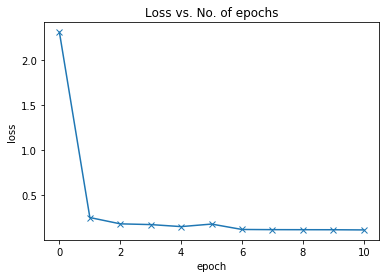

In [101]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

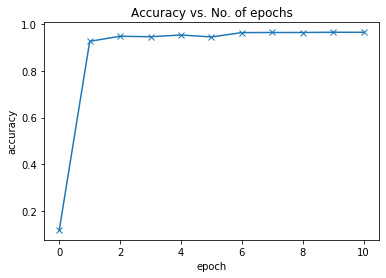

In [102]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [103]:
jovian.commit(project='04-feedforward-nn', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


ConnectionError: HTTPSConnectionPool(host='api.jovian.ai', port=443): Max retries exceeded with url: /user/profile (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000226ED9CB648>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [104]:
test_dataset = MNIST(root='data/', train=False, transform=ToTensor())

In [105]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: tensor(7) , Predicted: 7


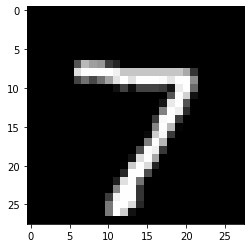

In [106]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: tensor(2) , Predicted: 2


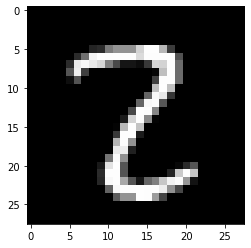

In [107]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: tensor(9) , Predicted: 9


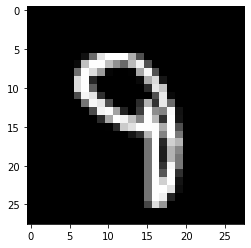

In [108]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [109]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

C:\Users\USER-PC\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


{'val_loss': 0.10623849928379059, 'val_acc': 0.9664062261581421}

In [110]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_loss'])

ConnectionError: HTTPSConnectionPool(host='api.jovian.ai', port=443): Max retries exceeded with url: /data/record (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000226ED81FD48>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

In [ ]:
jovian.commit(project='04-feedforward-nn', environment=None, outputs=['mnist-feedforward.pth'])

# TOPIC FOUR

# TOPIC FIVE

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
project_name='05b-cifar10-resnet'

In [3]:
#pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vikthour
Your Kaggle Key: ········
animefacedataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os

DATA_DIR = './animefacedataset'
print(os.listdir(DATA_DIR))

In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])

valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [ ]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [ ]:
batch_size = 400

In [ ]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [ ]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

In [ ]:
show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 10), device)
model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                         grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)

In [ ]:
train_time='4:24'

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [ ]:
plot_lrs(history)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

In [ ]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'cifar10-resnet9.pth')

In [ ]:
import jovian

In [ ]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

In [ ]:
jovian.commit(project=project_name, environment=None, outputs=['cifar10-resnet9.pth'])

# TOPIC SIX

In [ ]:
project_name = '06b-anime-dcgan'

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

In [ ]:
import os

DATA_DIR = './animefacedataset'
print(os.listdir(DATA_DIR))

In [ ]:
print(os.listdir(DATA_DIR+'/images')[:10])